In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import spacy
import re
import spacy.cli
spacy.cli.download('pt_core_news_lg')
nlp = spacy.load('pt_core_news_lg')
import  nltk
print(nltk.__version__)
import pickle
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
3.7


In [3]:
import keras.utils
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding
from keras.layers import SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras import Model
from keras.utils import to_categorical
from keras.utils import pad_sequences 


#Importing the portuguese songs dataset

In [5]:
with open ('/content/drive/MyDrive/Progetto_TA_2022/pickled_df/df_pt_10K.pkl', mode='br') as inputfile:
  df_pt = pickle.load(inputfile)

In [6]:
df_pt

,Artist,Song,Genre,Language,Lyrics
0,green day,16 (tablatura),Pop,pt,intro verso e b g d a e refrão e b g d a e pas...
1,edson e hudson,uma canção pra você,Pop,pt,como uma flecha em meu coração entrou rasgando...
2,luan santana,garotas não merecem chorar,Pop,pt,ela é uma mulher menina que precisa urgentemen...
3,zeze di camargo e luciano,solidão no seu lugar,Pop,pt,senta de frente ao espelho se olhando brinca c...
4,14 bis,pele de verão,Rock,pt,cheiro maneiro de verão pele perto do sol dent...
...,...,...,...,...,...
9995,jota quest,celebração do inútil desejo,Rock,pt,por que você me faz andar sem rumo agora se nã...
9996,o rappa,auto-reverse,Rock,pt,felizes de uma maneira geral geral estamos viv...
9997,raul seixas,vera verinha,Rock,pt,vera verinha vera verás que serás minha sempre...
9998,projota,eu não sou nada,Pop,pt,estrofe alkappa sinceramente não acredito que ...


In [7]:
df_pt.shape

(10000, 5)

In [8]:
categories3 = ['Rock', 'Pop', 'Indie']

df_pt_3 = df_pt[df_pt['Genre'].isin(categories3)]

In [9]:
df_pt_3

,Artist,Song,Genre,Language,Lyrics
0,green day,16 (tablatura),Pop,pt,intro verso e b g d a e refrão e b g d a e pas...
1,edson e hudson,uma canção pra você,Pop,pt,como uma flecha em meu coração entrou rasgando...
2,luan santana,garotas não merecem chorar,Pop,pt,ela é uma mulher menina que precisa urgentemen...
3,zeze di camargo e luciano,solidão no seu lugar,Pop,pt,senta de frente ao espelho se olhando brinca c...
4,14 bis,pele de verão,Rock,pt,cheiro maneiro de verão pele perto do sol dent...
...,...,...,...,...,...
9995,jota quest,celebração do inútil desejo,Rock,pt,por que você me faz andar sem rumo agora se nã...
9996,o rappa,auto-reverse,Rock,pt,felizes de uma maneira geral geral estamos viv...
9997,raul seixas,vera verinha,Rock,pt,vera verinha vera verás que serás minha sempre...
9998,projota,eu não sou nada,Pop,pt,estrofe alkappa sinceramente não acredito que ...


In [10]:
labels = df_pt_3['Genre'].unique()

Text(0.5, 1.0, 'Distribuzione Classi')

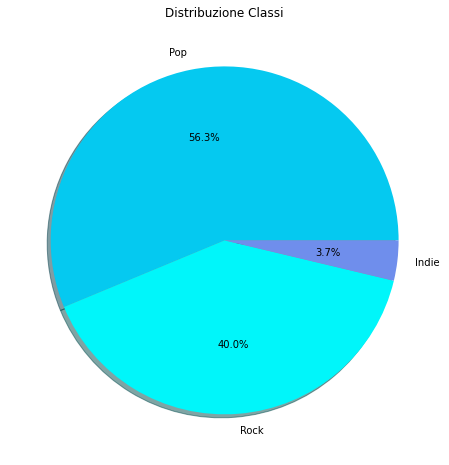

In [11]:
plt.rcParams["figure.figsize"] = [12,8]
colors = ['#05c9f0', '#00f6fa', '#6f8eec', '#b2d5f0', '#075997']
plt.pie(df_pt_3['Genre'].value_counts(), labels =labels, autopct = '%1.1f%%',colors = colors, shadow = True)
plt.title('Distribuzione Classi')

#Splitting the dataset in training set and test set

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

In [13]:
pt_train, pt_test = sklearn.model_selection.train_test_split(df_pt_3, test_size=0.20, train_size=0.80)

In [14]:
pt_train.shape

(7704, 5)

In [15]:
pt_test.shape

(1926, 5)

In [16]:
pt_test['Genre'].value_counts() 

Pop      1088
Rock      752
Indie      86
Name: Genre, dtype: int64

#Tokenizing the lyrics with spacy

In [17]:
x_train = pt_train['Lyrics'].tolist()
y_train = pt_train['Genre'].tolist()

In [18]:
x_test = pt_test['Lyrics'].tolist()
y_test = pt_test['Genre'].tolist()

In [19]:
len(x_train), len(y_train), len(x_test), len(y_test)

(7704, 7704, 1926, 1926)

In [20]:
set(y_train)

{'Indie', 'Pop', 'Rock'}

In [21]:
sample_idx = 1345
x_train[sample_idx]

'jesus quando andou no mundo nos deixou muitas lições que estão no livro sagrado ensinando as gerações o mestre tratava todos com carinho e muito amor fosse quem o procurasse um mendigo ou um doutor um dia foi a jesus um ricaço fazendeiro que aos pés do salvador foi dizendo de joelhos senhor creio que viestes a humanidade salvar domingo em nossa casa te esperamos para almoçar chega o glorioso dia e naquela rica mansão a criadagem correndo com as ordens do patrão me traga o vinho mais nobre o novilho mais viçoso pois vou colocar a mesa um banquete majestoso quero mirra e unguento ouro prata e brilhante pois além do nazareno e suas doze acompanhantes virão também do governo alguns homens importantes e assim ficarei bem com deus e os governantes de repente aparece batendo lá no portão um andarilho cansado com um cajado na mão pedindo por caridade aconchego água e pão o pobre aos era atendida ouviu essa explicação estou muito ocupado e não posso lhe ajudar gente muito importante hoje vem m

In [22]:
y_train[sample_idx]

'Pop'

In [23]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

stopword_list = stopwords.words('portuguese')
punctuations = string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
def spacy_tokenizer (text):
   
    doc = nlp(text)

    #lemmatizing tokens and lowering case
    lemmas = [token.lemma_.lower() for token in doc]

    #removing stopwords and punctuations
    lemmas_stop= [token for token in lemmas if token not in stopword_list and token not in punctuations]  

    lemma_bigrams = ['BI_'+p1+'_'+p2 for p1,p2 in nltk.ngrams(lemmas_stop,2)]
    lemma_trigrams = ['TRI_'+p1+'_'+p2+'_'+p3 for p1,p2,p3 in nltk.ngrams(lemmas_stop,3)] 
    
    all_tokens = list()
    all_tokens.extend(lemmas_stop)
    all_tokens.extend(lemma_bigrams)
    all_tokens.extend(lemma_trigrams)
    return all_tokens

In [25]:
vectors = CountVectorizer (analyzer = spacy_tokenizer, min_df = 10)

In [26]:
print ('fit')
vectors.fit(x_train)
print('transform')
x_train_tok = vectors.transform(x_train)
x_test_tok = vectors.transform(x_test)
print ('done')

fit
transform
done


In [27]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/pt3_x_train_tok.pkl', 'wb') as outfile:
  pickle.dump(x_train_tok, outfile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/pt3_x_test_tok.pkl', 'wb') as outfile:
  pickle.dump(x_test_tok, outfile)

In [28]:
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/pt3_x_train_tok.pkl', mode = 'br') as infile:
  x_train_tok = pickle.load(infile)
with open('/content/drive/MyDrive/Progetto_TA_2022/tokenized_df/pt3_x_test_tok.pkl', mode = 'br') as infile:
  x_test_tok = pickle.load(infile)

In [29]:
len(vectors.vocabulary_)

10543

In [30]:
vectors.vocabulary_

{'mil': 8882,
 'coração': 7421,
 'dentro': 7592,
 'de o': 7549,
 'noite': 9052,
 'sonhar': 10011,
 'ilusão': 8426,
 'nascer': 9010,
 'cada': 7019,
 'ano': 6613,
 'esperar': 7964,
 'estrela': 8005,
 'brilhar': 6968,
 'vivo': 10447,
 'apaixonado': 6629,
 'viver': 10446,
 'ver': 10374,
 'namorado': 9005,
 'algum': 6545,
 'coisa': 7261,
 'dizer': 7746,
 'paixão': 9175,
 'em o': 7834,
 'peito': 9258,
 'criar': 7464,
 'raiz': 9615,
 'feliz': 8109,
 'BI_dentro_de o': 1620,
 'BI_de o_noite': 1448,
 'BI_estrela_brilhar': 2304,
 'BI_noite_noite': 3534,
 'BI_noite_de o': 3524,
 'BI_noite_ver': 3543,
 'BI_algum_coisa': 198,
 'BI_coisa_dizer': 1014,
 'BI_paixão_em o': 3729,
 'BI_em o_peito': 2062,
 'existir': 8034,
 'vir': 10428,
 'vazio': 10348,
 'mané': 8796,
 'falar': 8059,
 'escrever': 7938,
 'ja': 8540,
 'mudar': 8961,
 'historia': 8380,
 'vinte': 10420,
 'vez': 10391,
 'coelho': 7259,
 'sair': 9827,
 'gato': 8289,
 'orelha': 9134,
 'grudar': 8352,
 'cola': 7266,
 'aqui': 6665,
 'roça': 9794,


#SVM Classification - 3 classes

---



---




Classification report:
              precision    recall  f1-score   support

       Indie       0.80      0.09      0.17        86
         Pop       0.83      0.84      0.83      1088
        Rock       0.72      0.78      0.75       752

    accuracy                           0.78      1926
   macro avg       0.78      0.57      0.58      1926
weighted avg       0.78      0.78      0.77      1926

Confusion matrix:
[[  8  22  56]
 [  2 910 176]
 [  0 164 588]]


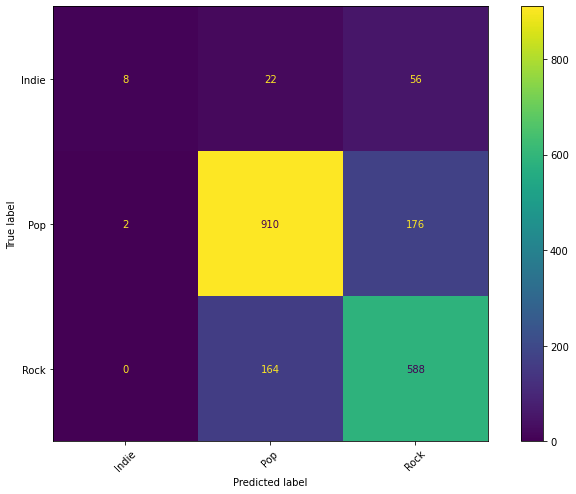

In [31]:
svm_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df = 2)), #tokenization
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

svm_pipeline.fit(x_train,y_train)
predictions = svm_pipeline.predict(x_test)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

ConfusionMatrixDisplay.from_estimator(svm_pipeline, x_test, y_test)  
plt.xticks(rotation=45)
plt.show()

SVM classification with tokenized lyrics - with  optimization of parameters

In [32]:
opt_pipeline = Pipeline([
    ('sel', SelectKBest(chi2)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

param_grid = [{'sel__k': [1000, 2000, 3000,'all'], 'learner__C': [0.01, 0.1, 1, 10, 100]}]
SVM_opt_search = GridSearchCV(opt_pipeline, param_grid, cv=None, n_jobs = 3, verbose=True).fit(x_train_tok,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [33]:
SVM_opt_search.best_params_

{'learner__C': 1, 'sel__k': 'all'}

In [34]:
SVM_opt_search.best_estimator_

Pipeline(steps=[('sel',
                 SelectKBest(k='all',
                             score_func=<function chi2 at 0x7f72c8c0d200>)),
                ('tfidf', TfidfTransformer()), ('learner', LinearSVC(C=1))])

In [35]:
opt_predictions = SVM_opt_search.best_estimator_.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, opt_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, opt_predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Indie       0.69      0.13      0.22        86
         Pop       0.82      0.83      0.82      1088
        Rock       0.71      0.76      0.73       752

    accuracy                           0.77      1926
   macro avg       0.74      0.57      0.59      1926
weighted avg       0.77      0.77      0.76      1926

Confusion matrix:
[[ 11  23  52]
 [  2 904 182]
 [  3 178 571]]


# Random Forest Classification - 3 classes

---




In [36]:
RF_pipeline = Pipeline([
    ('sel', SelectKBest(chi2, k=3000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier())  # learning algorithm
])

RF_pipeline.fit(x_train_tok,y_train)
predictions = RF_pipeline.predict(x_test_tok)

print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification report:
              precision    recall  f1-score   support

       Indie       1.00      0.13      0.23        86
         Pop       0.78      0.90      0.84      1088
        Rock       0.76      0.67      0.72       752

    accuracy                           0.78      1926
   macro avg       0.85      0.57      0.59      1926
weighted avg       0.78      0.78      0.76      1926

Confusion matrix:
[[ 11  29  46]
 [  0 978 110]
 [  0 246 506]]


#LSTM Classification - 3 classes

---



---



In [37]:
pt_train['Genre_number'] = pt_train['Genre']

numbers = []

for i in pt_train['Genre']:
  if i == 'Rock':
    numbers.append(0)

  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Indie':
    numbers.append(2)
  
  

In [38]:
pt_train['Genre_number'] = numbers

In [39]:
pt_test['Genre_number'] = pt_test['Genre']

numbers_test = []

for i in pt_test['Genre']:
  if i == 'Rock':
    numbers_test.append(0)

  if i == 'Pop':
    numbers_test.append(1)
  
  elif i == 'Indie':
    numbers_test.append(2)
  

In [40]:
pt_test['Genre_number'] = numbers_test

In [41]:
pt_train.sample(5)

,Artist,Song,Genre,Language,Lyrics,Genre_number
343,elza soares,dura na queda,Indie,pt,perdida na avenida canta seu enredo fora do ca...,2
7969,naiara azevedo,ele não merece a gente (part. paula mattos),Pop,pt,eu não fui a primeira nem serei a última vou t...,1
1877,velhas virgens,a última partida de bilhar,Rock,pt,depois de tantos anos na balada conclui que aq...,0
3286,jeann julio,beba beba (part. thaeme e thiago),Pop,pt,cê não acredita paga pra ver ela bebe bem mais...,1
9190,humberto e ronaldo,romance (part. jorge e mateus),Pop,pt,chega mais perto vai quero te encontrar quero ...,1


In [42]:
y_train = pt_train['Genre_number'] #substituting the columns in the variables
y_test = pt_test['Genre_number']

In [43]:
y_train = to_categorical(y_train,3)  #converting to one-hot vectors
y_test = to_categorical(y_test, 3)

In [44]:
y_train.shape, y_test.shape

((7704, 3), (1926, 3))

In [45]:
#max number of words to be used
max_features = 20000

#fixed size
embed_size = 128

batch_size = 64
epochs = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200) #maxlen=max number of words in each lyrics
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [46]:
X_train_final.shape, y_train.shape

((7704, 200), (7704, 3))

In [47]:
X_test_final.shape, y_test.shape

((1926, 200), (1926, 3))

In [48]:
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(LSTM(10, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 10)                5560      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0

In [49]:
lstm3 = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=epochs, 
                 shuffle = True, 
                 validation_split=0.2, 
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
lstm3

Epoch 1/10
97/97 [==============================] - 30s 265ms/step - loss: 0.8908 - accuracy: 0.5439 - val_loss: 0.8375 - val_accuracy: 0.5334
Epoch 2/10
97/97 [==============================] - 25s 263ms/step - loss: 0.8267 - accuracy: 0.5606 - val_loss: 0.8307 - val_accuracy: 0.5334
Epoch 3/10
97/97 [==============================] - 25s 261ms/step - loss: 0.8171 - accuracy: 0.5671 - val_loss: 0.8298 - val_accuracy: 0.5334
Epoch 4/10
97/97 [==============================] - 25s 261ms/step - loss: 0.8139 - accuracy: 0.5684 - val_loss: 0.8306 - val_accuracy: 0.5334
Epoch 5/10
97/97 [==============================] - 25s 262ms/step - loss: 0.8138 - accuracy: 0.5690 - val_loss: 0.8301 - val_accuracy: 0.5334
Epoch 6/10
97/97 [==============================] - 26s 263ms/step - loss: 0.8114 - accuracy: 0.5692 - val_loss: 0.8300 - val_accuracy: 0.5334


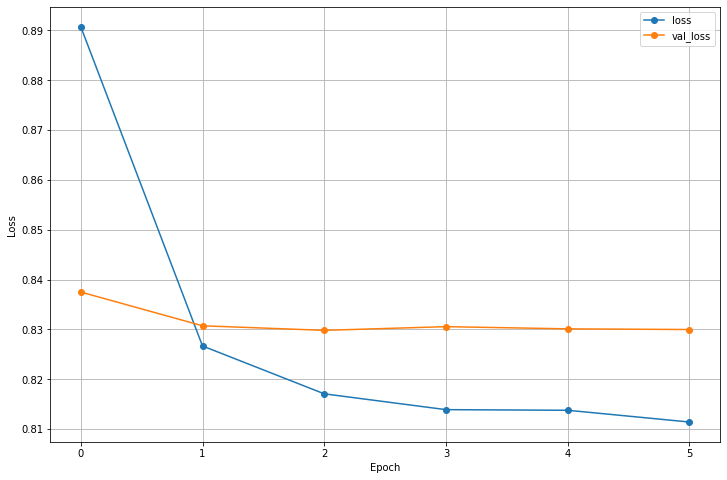

In [50]:
plt.plot(lstm3.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM Classification

In [51]:
lstm3_pred = np.round(model.predict(X_test_final))

61/61 [==============================] - 2s 24ms/step


In [52]:
print('Accuracy %s' % accuracy_score(y_test, lstm3_pred))
print('F1-score %s' % f1_score(y_test, lstm3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3_pred, zero_division=1))

Accuracy 0.564901349948079
F1-score [0.         0.72196417 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       752
           1       0.56      1.00      0.72      1088
           2       1.00      0.00      0.00        86

   micro avg       0.56      0.56      0.56      1926
   macro avg       0.85      0.33      0.24      1926
weighted avg       0.75      0.56      0.41      1926
 samples avg       0.56      0.56      0.56      1926



#CNN Classification - 3 classes

In [53]:
#max number of words to be used
max_features = 20000
#fixed size
embed_size = 128

batch_size = 64
epochs = 20
filters = 10
kernel_size = 3
hidden_dims = 10

tokenizer = Tokenizer(num_words=max_features, lower=True)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

X_train_final = pad_sequences(list_tokenized_train, maxlen=200)
X_test_final = pad_sequences(list_tokenized_test, maxlen=200)

In [54]:
model = Sequential()

model.add(Embedding(max_features, embed_size))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 dropout_3 (Dropout)         (None, None, 128)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 10)          3850      
                                                                 
 global_max_pooling1d (Globa  (None, 10)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                      

In [55]:
cnn3= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
109/109 [==============================] - 8s 63ms/step - loss: 0.8901 - accuracy: 0.5410 - val_loss: 0.8207 - val_accuracy: 0.5253
Epoch 2/20
109/109 [==============================] - 7s 60ms/step - loss: 0.8260 - accuracy: 0.5653 - val_loss: 0.8135 - val_accuracy: 0.5253
Epoch 3/20
109/109 [==============================] - 7s 60ms/step - loss: 0.8212 - accuracy: 0.5661 - val_loss: 0.8147 - val_accuracy: 0.5253
Epoch 4/20
109/109 [==============================] - 12s 109ms/step - loss: 0.8162 - accuracy: 0.5661 - val_loss: 0.8123 - val_accuracy: 0.5253
Epoch 5/20
109/109 [==============================] - 8s 78ms/step - loss: 0.8146 - accuracy: 0.5661 - val_loss: 0.8150 - val_accuracy: 0.5253
Epoch 6/20
109/109 [==============================] - 8s 72ms/step - loss: 0.8135 - accuracy: 0.5661 - val_loss: 0.8149 - val_accuracy: 0.5253
Epoch 7/20
109/109 [==============================] - 10s 93ms/step - loss: 0.8118 - accuracy: 0.5661 - val_loss: 0.8126 - val_accuracy: 0.5

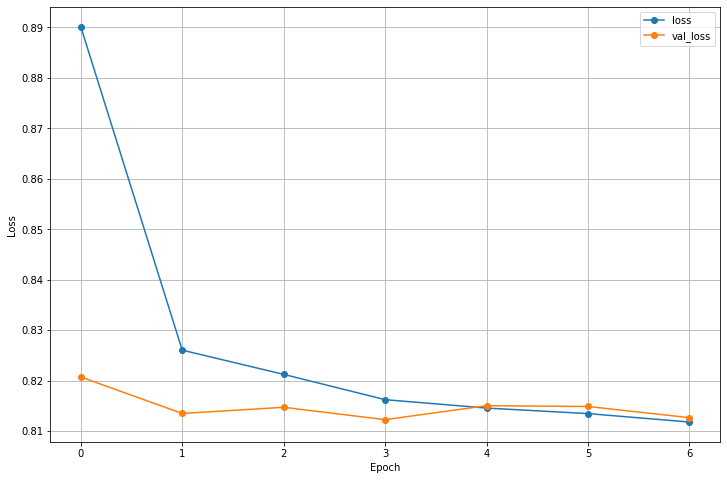

In [56]:
plt.plot(cnn3.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification

In [57]:
cnn3_pred = np.round(model.predict(X_test_final))

61/61 [==============================] - 0s 7ms/step


In [58]:
print('Accuracy %s' % accuracy_score(y_test, cnn3_pred))
print('F1-score %s' % f1_score(y_test, cnn3_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3_pred, zero_division=1))

Accuracy 0.564901349948079
F1-score [0.         0.72196417 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       752
           1       0.56      1.00      0.72      1088
           2       1.00      0.00      0.00        86

   micro avg       0.56      0.56      0.56      1926
   macro avg       0.85      0.33      0.24      1926
weighted avg       0.75      0.56      0.41      1926
 samples avg       0.56      0.56      0.56      1926



#Classification with FastText

In [59]:
import codecs
#load embeddings
print('loading word embeddings...')
#dictionary where the keys will be words and the values will be coefficients 
embeddings_index = {}
f = codecs.open('../content/drive/MyDrive/Progetto_TA_2022/embeddings/cc.pt.300.vec', encoding='utf-8')
for line in f:
    #values returns a list where the first element is a word and the others are the vector coefficients for that word
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 2000000 word vectors


In [60]:

embed_size = 300 #standard length for FastTest
X_train_final = pad_sequences(list_tokenized_train, maxlen=200)
X_test_final = pad_sequences (list_tokenized_test, maxlen=200)

In [61]:
max_features = 20000
tokenizer = Tokenizer (num_words = max_features)
tokenizer.fit_on_texts(list(x_train))
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

dictionary size:  35060


In [62]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 803


In [63]:
word_index

{'que': 1,
 'eu': 2,
 'o': 3,
 'e': 4,
 'de': 5,
 'a': 6,
 'não': 7,
 'é': 8,
 'você': 9,
 'me': 10,
 'pra': 11,
 'se': 12,
 'um': 13,
 'te': 14,
 'do': 15,
 'meu': 16,
 'no': 17,
 'na': 18,
 'em': 19,
 'mais': 20,
 'amor': 21,
 'só': 22,
 'com': 23,
 'vai': 24,
 'vou': 25,
 'da': 26,
 'mas': 27,
 'por': 28,
 'seu': 29,
 'uma': 30,
 'tem': 31,
 'minha': 32,
 'tudo': 33,
 'sem': 34,
 'quero': 35,
 'já': 36,
 'quando': 37,
 'ela': 38,
 'mim': 39,
 'quem': 40,
 'vida': 41,
 'ser': 42,
 'sei': 43,
 'sou': 44,
 'os': 45,
 'coração': 46,
 'como': 47,
 'tá': 48,
 'as': 49,
 'gente': 50,
 'bem': 51,
 'foi': 52,
 'faz': 53,
 'tô': 54,
 'vem': 55,
 'dia': 56,
 'nem': 57,
 'sua': 58,
 'ver': 59,
 'assim': 60,
 'aqui': 61,
 'sempre': 62,
 'mundo': 63,
 'tempo': 64,
 'agora': 65,
 'tão': 66,
 'para': 67,
 'quer': 68,
 'nada': 69,
 'pode': 70,
 'até': 71,
 'hoje': 72,
 'ter': 73,
 'fazer': 74,
 'ou': 75,
 'essa': 76,
 'nunca': 77,
 'lá': 78,
 'ao': 79,
 'ele': 80,
 'todo': 81,
 'ninguém': 82,
 'esse

In [64]:
words_not_found[:50]

['leandrostz',
 'nokudum',
 'paparará',
 'piririm',
 'manhã£',
 '\xa0',
 'cafã',
 'alã',
 'thururuthu',
 'rêen',
 'spyro',
 'caozada',
 'parpando',
 'pararara',
 'pinguilim',
 'mamana',
 'dararara',
 'daron',
 'popoy',
 'domênica',
 'pararapa',
 'dumingaz',
 'dondon',
 'farofei',
 'guarija',
 'lonest',
 'giselda',
 'aaaaaahhhh',
 'enrow',
 'dealema',
 'arê',
 'oquêcêque',
 'tutudum',
 'embrazando',
 'vivro',
 'tihuana',
 'turututum',
 'thara',
 'thururu',
 'pêti',
 'pêta',
 'djô',
 'alacazam',
 'larilariaaaa',
 'gorpe',
 'etzinho',
 'uououo',
 'iêiêié',
 'larala',
 'tcharara']

#LSTM Training with FastText - 3 classes

In [65]:
model = Sequential()
model.add(Embedding(nb_words, embed_size, weights = [embedding_matrix], trainable = False))
model.add(LSTM(12, return_sequences=True))
model.add(Dropout(0.4))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         6000000   
                                                                 
 lstm_1 (LSTM)               (None, None, 12)          15024     
                                                                 
 dropout_6 (Dropout)         (None, None, 12)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 12)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                416       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                      

In [66]:
lstm3_FT = model.fit(X_train_final, y_train,
                 batch_size=batch_size, 
                 epochs=10, 
                 shuffle = True, 
                 validation_split=0.2,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
97/97 [==============================] - 13s 110ms/step - loss: 0.8519 - accuracy: 0.5582 - val_loss: 0.8353 - val_accuracy: 0.5334
Epoch 2/10
97/97 [==============================] - 10s 104ms/step - loss: 0.8158 - accuracy: 0.5632 - val_loss: 0.8299 - val_accuracy: 0.5334
Epoch 3/10
97/97 [==============================] - 10s 104ms/step - loss: 0.8048 - accuracy: 0.5664 - val_loss: 0.8249 - val_accuracy: 0.5334
Epoch 4/10
97/97 [==============================] - 10s 106ms/step - loss: 0.8003 - accuracy: 0.5666 - val_loss: 0.8228 - val_accuracy: 0.5334
Epoch 5/10
97/97 [==============================] - 10s 105ms/step - loss: 0.7964 - accuracy: 0.5695 - val_loss: 0.8164 - val_accuracy: 0.5334
Epoch 6/10
97/97 [==============================] - 10s 106ms/step - loss: 0.7907 - accuracy: 0.5780 - val_loss: 0.8131 - val_accuracy: 0.5334
Epoch 7/10
97/97 [==============================] - 10s 106ms/step - loss: 0.7814 - accuracy: 0.5880 - val_loss: 0.8061 - val_accuracy: 0.5905

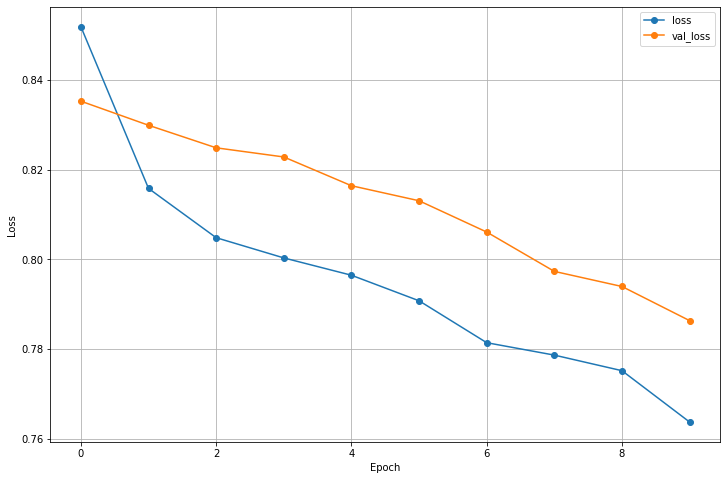

In [67]:
plt.plot(lstm3_FT.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_FT.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM with FT

In [68]:
lstm3FT_pred = np.round(model.predict(X_test_final))

61/61 [==============================] - 2s 24ms/step


In [69]:
print('Accuracy %s' % accuracy_score(y_test, lstm3FT_pred))
print('F1-score %s' % f1_score(y_test, lstm3FT_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3FT_pred, zero_division=1))

Accuracy 0.5327102803738317
F1-score [0.56730769 0.63787721 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       752
           1       0.74      0.56      0.64      1088
           2       1.00      0.00      0.00        86

   micro avg       0.67      0.53      0.59      1926
   macro avg       0.77      0.37      0.40      1926
weighted avg       0.69      0.53      0.58      1926
 samples avg       0.73      0.53      0.53      1926



#CNN classification with FastText - 3 classes

In [70]:
model = Sequential()

model.add(Embedding(max_features, embed_size, weights = [embedding_matrix], trainable =False))
model.add(Dropout(0.4))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

#vanilla dense layer
model.add(Dense(hidden_dims, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#vanilla dense layer
model.add(Dense(hidden_dims))
model.add(Dropout(0.4))
model.add(Activation('relu'))

#output layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         6000000   
                                                                 
 dropout_9 (Dropout)         (None, None, 300)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 10)          9010      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                      

In [71]:
cnn3_FT= model.fit(X_train_final, y_train, 
          batch_size = batch_size, 
          epochs=epochs, 
          shuffle=True, 
          validation_split=0.1,
          callbacks= [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
109/109 [==============================] - 12s 99ms/step - loss: 0.8990 - accuracy: 0.5519 - val_loss: 0.8371 - val_accuracy: 0.5253
Epoch 2/20
109/109 [==============================] - 11s 97ms/step - loss: 0.8407 - accuracy: 0.5569 - val_loss: 0.8102 - val_accuracy: 0.5253
Epoch 3/20
109/109 [==============================] - 11s 98ms/step - loss: 0.8245 - accuracy: 0.5570 - val_loss: 0.7993 - val_accuracy: 0.5253
Epoch 4/20
109/109 [==============================] - 11s 98ms/step - loss: 0.8179 - accuracy: 0.5634 - val_loss: 0.7911 - val_accuracy: 0.5266
Epoch 5/20
109/109 [==============================] - 11s 97ms/step - loss: 0.8032 - accuracy: 0.5739 - val_loss: 0.7699 - val_accuracy: 0.5914
Epoch 6/20
109/109 [==============================] - 11s 97ms/step - loss: 0.7859 - accuracy: 0.6019 - val_loss: 0.7577 - val_accuracy: 0.6031
Epoch 7/20
109/109 [==============================] - 11s 98ms/step - loss: 0.7736 - accuracy: 0.6194 - val_loss: 0.7226 - val_accuracy:

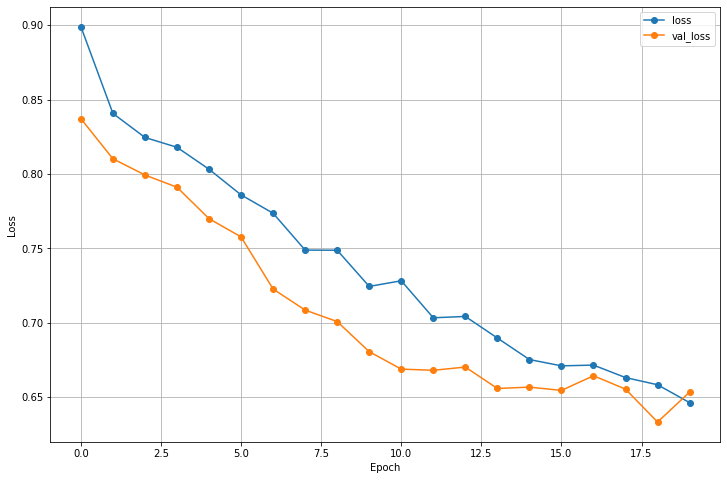

In [72]:
plt.plot(cnn3_FT.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3_FT.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN with FastText

In [73]:
cnn3FT_pred = np.round(model.predict(X_test_final))

61/61 [==============================] - 1s 10ms/step


In [74]:
print('Accuracy %s' % accuracy_score(y_test, cnn3FT_pred))
print('F1-score %s' % f1_score(y_test, cnn3FT_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3FT_pred, zero_division=1))

Accuracy 0.7019730010384216
F1-score [0.62168309 0.79527227 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.55      0.62       752
           1       0.74      0.87      0.80      1088
           2       1.00      0.00      0.00        86

   micro avg       0.73      0.70      0.72      1926
   macro avg       0.82      0.47      0.47      1926
weighted avg       0.74      0.70      0.69      1926
 samples avg       0.74      0.70      0.70      1926



#Classification with Word2Vec - 3 classes

In [75]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [76]:
pip install --upgrade gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 2.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [77]:
import gensim
from gensim.models import Word2Vec

In [78]:
df_pt_3['Genre_number'] = df_pt_3['Genre'] #converting the strings into int in the Genre column

numbers = []
for i in df_pt_3['Genre']:
  if i == 'Rock':
    numbers.append(0)
  
  if i == 'Pop':
    numbers.append(1)
  
  elif i == 'Indie':
   numbers.append(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
df_pt_3['Genre_number'] = numbers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
#Gensim word2vec requires sentences in input so i split the lyrics into sentences
sentence_splitter = nltk.data.load('tokenizers/punkt/portuguese.pickle')
sentences =[]
sum=0
for lyrics in df_pt_3['Lyrics']:
  sents = sentence_splitter.tokenize(lyrics.strip())
  sum+=len(sents)
  for sent in sents:
    sentences.append(sent.split())
print(sum)
print(len(sentences))

9630
9630


In [81]:
#checking that the sentences are in the correct format
for sent in sentences[:5]:
  print(sent, "\n")

['intro', 'verso', 'e', 'b', 'g', 'd', 'a', 'e', 'refrão', 'e', 'b', 'g', 'd', 'a', 'e', 'passagem', 'e', 'b', 'g', 'd', 'a', 'e'] 

['como', 'uma', 'flecha', 'em', 'meu', 'coração', 'entrou', 'rasgando', 'no', 'peito', 'o', 'seu', 'amor', 'seu', 'jeito', 'lindo', 'de', 'ser', 'me', 'fez', 'voltar', 'a', 'viver', 'e', 'esquecer', 'toda', 'dor', 'parou', 'a', 'chuva', 'nasceu', 'o', 'sol', 'tá', 'colorido', 'meu', 'mundo', 'eu', 'nunca', 'fui', 'tão', 'feliz', 'então', 'por', 'isso', 'que', 'eu', 'fiz', 'essa', 'canção', 'pra', 'você', 'te', 'amo', 'nana', 'nana', 'nana', 'eu', 'te', 'ofereço', 'essa', 'canção', 'te', 'amo', 'e', 'te', 'prometo', 'por', 'toda', 'a', 'vida', 'o', 'meu', 'amor', 'nessa', 'canção', 'pra', 'você', 'com', 'esse', 'amor', 'eu', 'tanto', 'sonhei', 'mas', 'era', 'quase', 'impossivel', 'acreditar', 'que', 'eu', 'iria', 'encontrar', 'a', 'minha', 'lua', 'meu', 'mar', 'e', 'me', 'aparece', 'você', 'você', 'é', 'o', 'brilho', 'do', 'meu', 'olhar', 'é', 'tudo', 'o',

In [82]:
#creating the w2v embeddings
w2v_model=gensim.models.Word2Vec(sentences=sentences, vector_size=300, window=10, min_count=1)

In [83]:
w2v_model.train(sentences, epochs=10, total_examples=len(sentences))

(12311396, 16588100)

In [84]:
#total num of extracted words
vocab = w2v_model.wv.index_to_key
print("Total number of words: ", len(vocab))

Total number of words:  38608


In [85]:
w2v_model.wv.most_similar('ela')

[('dela', 0.5372461676597595),
 ('nela', 0.4526965916156769),
 ('gostosa', 0.4225066602230072),
 ('pi', 0.41742902994155884),
 ('aconticido', 0.39936181902885437),
 ('amiga', 0.39360934495925903),
 ('desdentada', 0.37971410155296326),
 ('bichinha', 0.3706766366958618),
 ('conduça', 0.36893245577812195),
 ('poderosa', 0.3686085641384125)]

In [86]:
#creating a dictionary with words in vocab and their embeddings. It will be used to create the embedding matrix 

word_vec_dict={}

for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)

len(word_vec_dict)

38608

In [87]:
#finding the max length of the lyrics
maxi = -1
for i, lyrics in enumerate(df_pt_3['Lyrics']):
  tokens=lyrics.split()
  if(len(tokens)>maxi):
    maxi=len(tokens)

print(maxi)

2112


In [88]:
#integer encoding the words in the lyrics using Keras Tokenizer
tok=Tokenizer()
tok.fit_on_texts(df_pt_3['Lyrics'])
vocab_size = len(tok.word_index) +1
encoded_lyrics = tok.texts_to_sequences(df_pt_3['Lyrics'])

In [89]:
max_lyrics_len=maxi
embed_dim = 300

#padding every sequence to the max length
padded_lyrics=pad_sequences(encoded_lyrics, maxlen=max_lyrics_len, padding='post')
padded_lyrics.shape

(9630, 2112)

In [90]:
vocab_size

38692

In [91]:
#creating the embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None: #if the word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
    #if the word is not found, the vector corresponding to the embedding will be filled with zeros

In [92]:
Y= to_categorical(df_pt_3['Genre_number'], 3) #transforming the labels into one hot vectors
x_train,x_test,y_train,y_test=train_test_split(padded_lyrics, Y,test_size=0.20,random_state=42)

In [93]:
y_train.shape, y_test.shape

((7704, 3), (1926, 3))

#LSTM Classification with Word2vec - 3 classes

In [94]:
from keras.initializers import Constant


In [95]:
epochs=5
batch_size=64

In [96]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable = False, embeddings_initializer=Constant(embed_matrix)))
model.add(LSTM(12, dropout=0.4, recurrent_dropout=0.4))
model.add(Dropout(0.4))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.8), metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 2112, 300)         11607600  
                                                                 
 lstm_2 (LSTM)               (None, 12)                15024     
                                                                 
 dropout_12 (Dropout)        (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 24)                312       
                                                                 
 dropout_13 (Dropout)        (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                 75        
                                                                 
Total params: 11,623,011
Trainable params: 15,411
Non-

In [97]:
lstm3_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
97/97 [==============================] - 455s 5s/step - loss: 0.8388 - accuracy: 0.5613 - val_loss: 0.8202 - val_accuracy: 0.5490
Epoch 2/5
97/97 [==============================] - 431s 4s/step - loss: 0.8165 - accuracy: 0.5627 - val_loss: 0.8210 - val_accuracy: 0.5490
Epoch 3/5
97/97 [==============================] - 432s 4s/step - loss: 0.8170 - accuracy: 0.5629 - val_loss: 0.8207 - val_accuracy: 0.5490
Epoch 4/5
97/97 [==============================] - 431s 4s/step - loss: 0.8169 - accuracy: 0.5629 - val_loss: 0.8182 - val_accuracy: 0.5490
Epoch 5/5
97/97 [==============================] - 427s 4s/step - loss: 0.8168 - accuracy: 0.5629 - val_loss: 0.8201 - val_accuracy: 0.5490


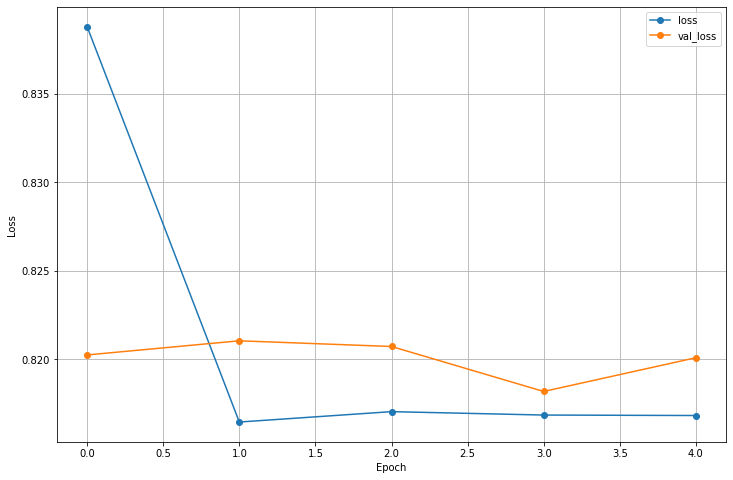

In [98]:
plt.plot(lstm3_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(lstm3_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing LSTM CLassification with w2v

In [99]:
lstm3W2V_pred = np.round(model.predict(x_test))

61/61 [==============================] - 19s 303ms/step


In [100]:
print('Accuracy %s' % accuracy_score(y_test, lstm3W2V_pred))
print('F1-score %s' % f1_score(y_test, lstm3W2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, lstm3W2V_pred, zero_division=1))

Accuracy 0.5726895119418484
F1-score [0.         0.72829317 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       757
           1       0.57      1.00      0.73      1103
           2       1.00      0.00      0.00        66

   micro avg       0.57      0.57      0.57      1926
   macro avg       0.86      0.33      0.24      1926
weighted avg       0.76      0.57      0.42      1926
 samples avg       0.57      0.57      0.57      1926



#CNN Classification with Word2Vec - 3 classes

In [101]:
filters=10
kernel_size=3
epochs=20

In [102]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_lyrics_len, trainable= False, embeddings_initializer=Constant(embed_matrix)))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.8), metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 2112, 300)         11607600  
                                                                 
 conv1d_2 (Conv1D)           (None, 2110, 10)          9010      
                                                                 
 global_max_pooling1d_3 (Glo  (None, 10)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_14 (Dropout)        (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                352       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                      

In [103]:
cnn3_w2v = model.fit(x_train,
                     y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True, 
                     validation_split=0.2, 
                     callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
97/97 [==============================] - 59s 600ms/step - loss: 0.9397 - accuracy: 0.5225 - val_loss: 0.8112 - val_accuracy: 0.5983
Epoch 2/20
97/97 [==============================] - 57s 592ms/step - loss: 0.8140 - accuracy: 0.5572 - val_loss: 0.7904 - val_accuracy: 0.6132
Epoch 3/20
97/97 [==============================] - 62s 641ms/step - loss: 0.7873 - accuracy: 0.5763 - val_loss: 0.7480 - val_accuracy: 0.6781
Epoch 4/20
97/97 [==============================] - 59s 609ms/step - loss: 0.7650 - accuracy: 0.6167 - val_loss: 0.7416 - val_accuracy: 0.6872
Epoch 5/20
97/97 [==============================] - 60s 623ms/step - loss: 0.7518 - accuracy: 0.6265 - val_loss: 0.7323 - val_accuracy: 0.7093
Epoch 6/20
97/97 [==============================] - 60s 618ms/step - loss: 0.7304 - accuracy: 0.6617 - val_loss: 0.7225 - val_accuracy: 0.6995
Epoch 7/20
97/97 [==============================] - 60s 614ms/step - loss: 0.7121 - accuracy: 0.6701 - val_loss: 0.7140 - val_accuracy: 0.7093

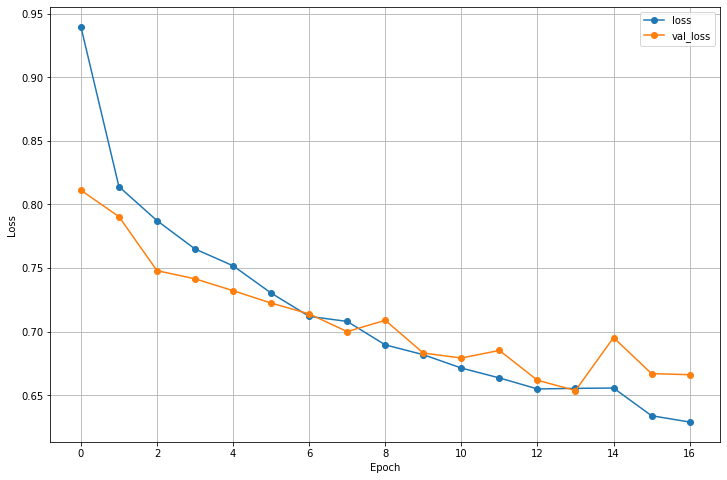

In [104]:
plt.plot(cnn3_w2v.history['loss'], label='loss', marker = 'o')
plt.plot(cnn3_w2v.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')

Testing CNN Classification with w2v

In [105]:
cnn3W2V_pred = np.round(model.predict(x_test))

61/61 [==============================] - 5s 82ms/step


In [106]:
print('Accuracy %s' % accuracy_score(y_test, cnn3W2V_pred))
print('F1-score %s' % f1_score(y_test, cnn3W2V_pred, average=None))
print('Classification report:')
print(classification_report(y_test, cnn3W2V_pred, zero_division=1))

Accuracy 0.6510903426791277
F1-score [0.6953125  0.69264544 0.        ]
Classification report:
              precision    recall  f1-score   support

           0       0.60      0.82      0.70       757
           1       0.88      0.57      0.69      1103
           2       1.00      0.00      0.00        66

   micro avg       0.71      0.65      0.68      1926
   macro avg       0.83      0.47      0.46      1926
weighted avg       0.77      0.65      0.67      1926
 samples avg       0.74      0.65      0.65      1926

